Use numerically stable formula to perform noise-free Gaussian Process with different SE parameters

Ref: Nado de Fritas, http://www.cs.ubc.ca/~nando/540-2013/lectures/gp.py

In [89]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

In [90]:
def f(x):
    return np.sin(0.9*x).flatten()

def kernel(A, B, l_para=1):
    A2 = np.sum(A**2, 1).reshape(-1, 1)  #  a N_a X 1 column vector
    B2 = np.sum(B**2, 1)  # a 1 x N_b row vector
    AdotB = np.dot(A, B.T)  # N_a x N_b 
    squared_dist = A2 + B2 - 2*AdotB    
    return np.exp(-0.5*squared_dist/l_para)

def GP_posterior(y, K, Ks, Kss):
    L = np.linalg.cholesky(K)
    m = np.linalg.solve(L, y)
    Lk = np.linalg.solve(L, Ks)    
    mu_s = np.dot(Lk.T, m)
    Sigma_s = Kss - np.dot(Lk.T, Lk)
    return mu_s, Sigma_s

In [91]:
def adjustAxeProperties(ax_obj, x_fontsize, x_rotation, y_fontsize, y_rotation):
    for tick in ax_obj.xaxis.get_major_ticks():
        tick.label.set_fontsize(x_fontsize)
        tick.label.set_rotation(x_rotation)
    for tick in ax_obj.yaxis.get_major_ticks():
        tick.label.set_fontsize(y_fontsize)
        tick.label.set_rotation(y_rotation)
        

In [92]:
np.random.seed(2125)
X_MIN = -5
X_MAX = 5

N_train = 10
sigma_y = 0
X_train = np.random.uniform(X_MIN, X_MAX, size=(N_train, 1))
y_train = f(X_train) + sigma_y * np.random.normal(N_train)

N_test = 50
X_test = np.linspace(X_MIN, X_MAX, N_test).reshape(-1, 1)

K = kernel(X_train, X_train)
Ks = kernel(X_train, X_test)
Kss = kernel(X_test, X_test)
Ky = K + sigma_y**2*np.eye(N_train)

mu_s, Sigma_s = GP_posterior(y_train, Ky, Ks, Kss)

posterior_std = np.sqrt(np.diag(Sigma_s))


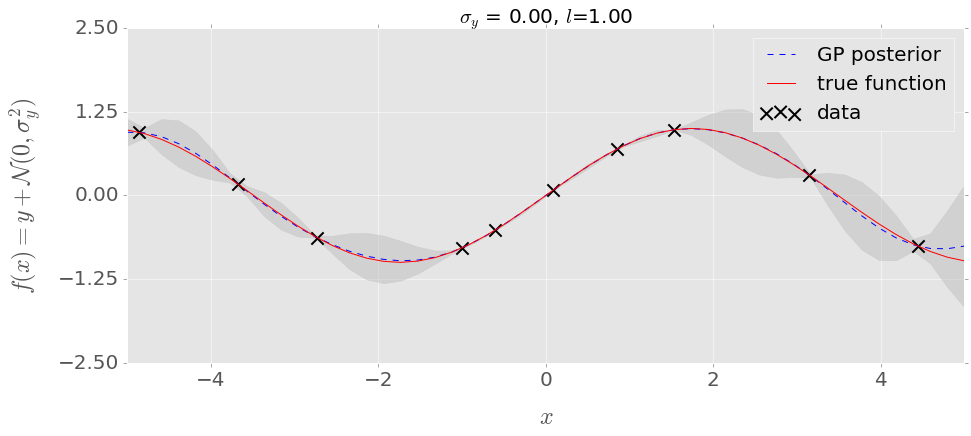

In [93]:
FONTSIZE = 20
plt.close('all')
fig, ax = plt.subplots(1, figsize=(15, 6))

ax.plot(X_test.flatten(), mu_s, linestyle='--', color='b', label='GP posterior')
ax.plot(X_test.flatten(), f(X_test.flatten()), linestyle='-', color='r', label='true function')
ax.fill_between(X_test.flatten(), mu_s-2*posterior_std, mu_s+2*posterior_std, alpha=0.5, color='0.75')

ax.scatter(X_train, y_train, marker='x', s=150, linewidth=2, color='k', label='data')
ax.legend(loc='best', fontsize=FONTSIZE)

ax.set_xlim(X_MIN, X_MAX)
ax.set_ylim(-2.5, 2.5)
ax.set_yticks(np.linspace(-2.5, 2.5, 5))
ax.set_xlabel(r'$x$', fontsize=FONTSIZE*1.2, labelpad=15)
ax.set_ylabel(r'$f(x) = y + \mathcal{N}(0, \sigma_y^2)$', fontsize=FONTSIZE*1.2, labelpad=15)
adjustAxeProperties(ax, FONTSIZE, 0, FONTSIZE, 0)
ax.set_title(r'$\sigma_y$ = {0:.2f}, $l$={1:.2f}'.format(sigma_y, 1.0), fontsize=FONTSIZE)

In [94]:
def generateGPexamples(sigma_y, l_para):
    np.random.seed(2125)
    X_MIN = -5
    X_MAX = 5

    N_train = 10
    X_train = np.random.uniform(X_MIN, X_MAX, size=(N_train, 1))
    y_train = f(X_train) + sigma_y * np.random.normal(N_train)
   
    N_test = 100
    X_test = np.linspace(X_MIN, X_MAX, N_test).reshape(-1, 1)

    K = kernel(X_train, X_train, l_para)
    Ks = kernel(X_train, X_test, l_para)
    Kss = kernel(X_test, X_test, l_para)
    
    Ky = K + (sigma_y**2)*np.eye(N_train)

    mu_s, Sigma_s = GP_posterior(y_train, Ky, Ks, Kss)

    posterior_std = np.sqrt(np.diag(Sigma_s))
    
    return X_train.flatten(), y_train, X_test.flatten(), mu_s, posterior_std, X_MIN, X_MAX


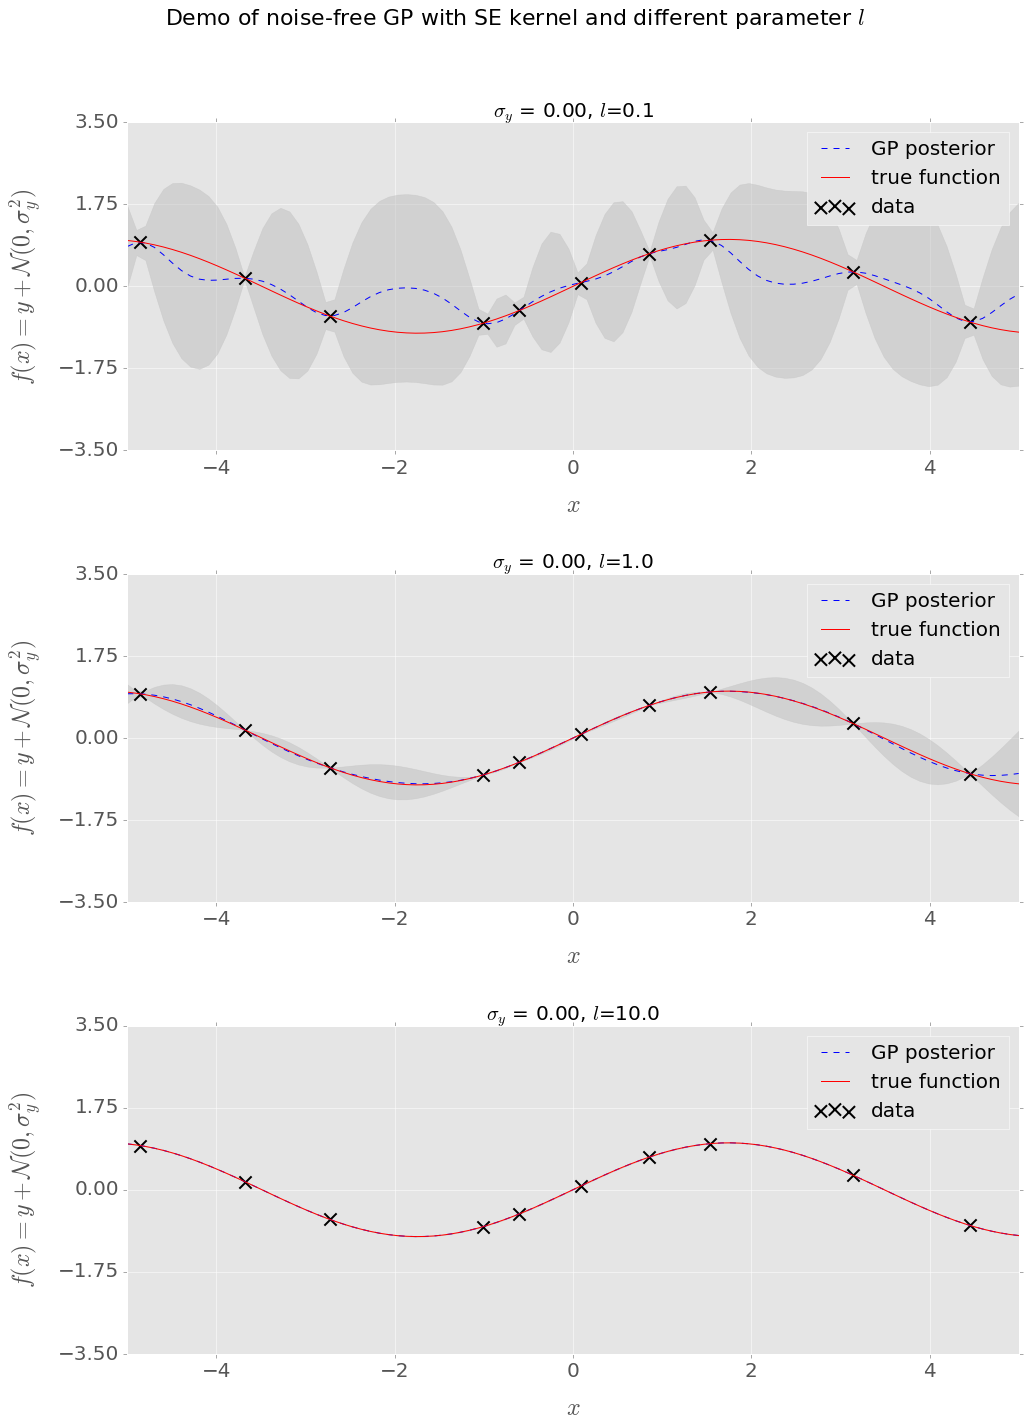

In [96]:
FONTSIZE = 20
plt.close('all')
fig = plt.figure(figsize=(14, 20))
gs = matplotlib.gridspec.GridSpec(3, 1)
sigma_y = 0
for i, l_para in enumerate([0.1, 1, 10]):
    ax = plt.subplot(gs[i, 0])
    
    x_train, y_train, x_test, mu_s, posterior_std, X_MIN, X_MAX = generateGPexamples(sigma_y, l_para)
    
    ax.plot(x_test, mu_s, linestyle='--', color='b', label='GP posterior')
    ax.plot(x_test, f(x_test), linestyle='-', color='r', label='true function')
    ax.fill_between(x_test, mu_s-2*posterior_std, mu_s+2*posterior_std, alpha=0.5, color='0.75')

    ax.scatter(x_train, y_train, marker='x', s=150, linewidth=2, color='k', label='data')
    ax.legend(loc='best', fontsize=FONTSIZE)

    ax.set_xlim(X_MIN, X_MAX)
    ax.set_ylim(-3.5, 3.5)
    ax.set_yticks(np.linspace(-3.5, 3.5, 5))
    ax.set_xlabel(r'$x$', fontsize=FONTSIZE*1.2, labelpad=15)
    ax.set_ylabel(r'$f(x) = y + \mathcal{N}(0, \sigma_y^2)$', fontsize=FONTSIZE*1.2, labelpad=15)
    adjustAxeProperties(ax, FONTSIZE, 0, FONTSIZE, 0)
    ax.set_title(r'$\sigma_y$ = {0:.2f}, $l$={1:.1f}'.format(sigma_y,l_para), fontsize=FONTSIZE)
    
plt.tight_layout(pad=0, w_pad=1.0, h_pad=5.0)
fig.suptitle(r'Demo of noise-free GP with SE kernel and different parameter $l$', fontsize=1.1*FONTSIZE)
plt.subplots_adjust(top=0.9)    
